## MachineKnight Hackathon

Here in the EDA.ipynb file we will be doing some basic data exploratory to better understand the insights of the provided data. It comes useful at the time of feature engineering and model building part.

In [1]:

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


pd.pandas.set_option('display.max_columns',None)

In [5]:
# Loading dataset

dataset=pd.read_csv('train.csv')

print(dataset.shape)

(2340, 25)


In [6]:
dataset.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,"Cauvery Colony,Koramangala",21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1250,25,2,E,2,6,12,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,09-10-2017 12:48,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,4,2,NE,2,3,4,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12-06-2018 22:02,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,6,3,E,3,1,5,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,3,1,E,1,1,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,15,3,E,4,0,0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [9]:
# Printing unique count of the Ids
print("Id of Houses {}".format(len(dataset.id)))

Id of Houses 2340


In [10]:
# Taking a look at the numerical features of the dataset

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

dataset[numerical_features].head()

Number of numerical variables:  14


,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
0,12.934471,77.634471,1,1,1,0,1250,25,2,2,6,12,2.0,40000.0
1,12.929557,77.672280,0,1,0,1,1400,4,2,2,3,4,2.0,22000.0
2,12.982870,80.262012,0,1,0,0,1350,6,3,3,1,5,3.0,28000.0
3,12.955991,77.531634,0,0,0,1,600,3,1,1,1,2,0.0,8000.0
4,12.963903,77.649446,0,0,0,1,1500,15,3,4,0,0,1.0,45000.0


In [13]:
# Displaying the total count of the discrete data
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 8


In [14]:
discrete_feature

['gym',
 'lift',
 'swimming_pool',
 'negotiable',
 'bathroom',
 'cup_board',
 'floor',
 'balconies']

In [15]:
dataset[discrete_feature].head()

,gym,lift,swimming_pool,negotiable,bathroom,cup_board,floor,balconies
0,1,1,1,0,2,2,6,2.0
1,0,1,0,1,2,2,3,2.0
2,0,1,0,0,3,3,1,3.0
3,0,0,0,1,1,1,1,0.0
4,0,0,0,1,3,4,0,1.0


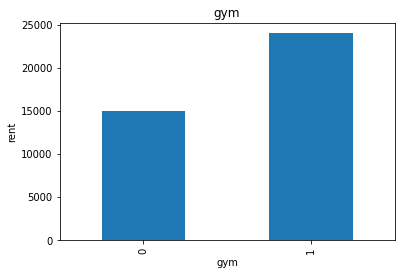

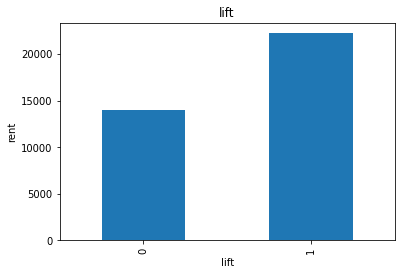

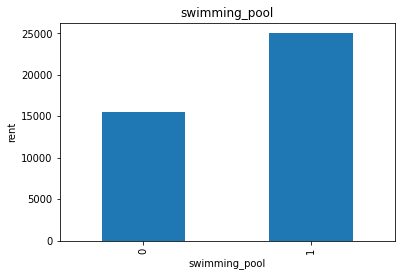

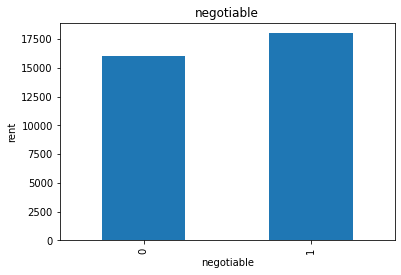

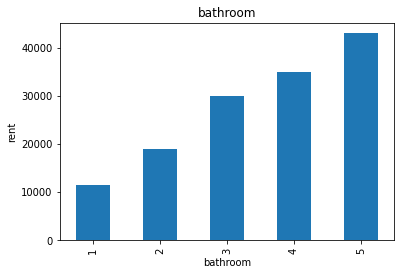

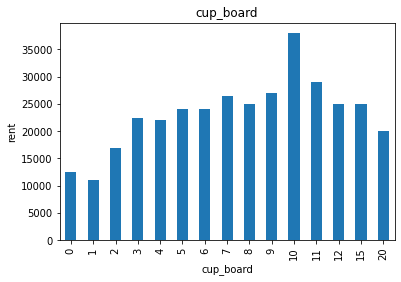

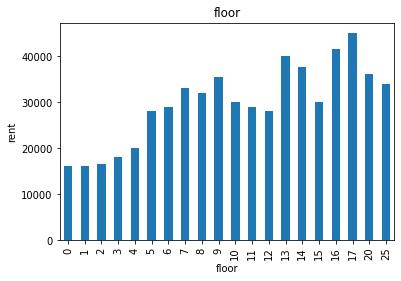

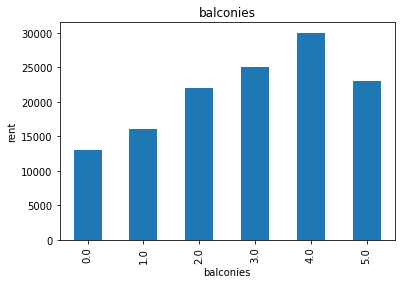

In [25]:

# Plotting the frequency of discrete featres against the independent variable

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['rent'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('rent')
    plt.title(feature)
    plt.show()

In [18]:
# Displaying the count of continuos values

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 6


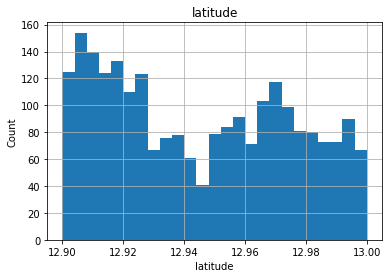

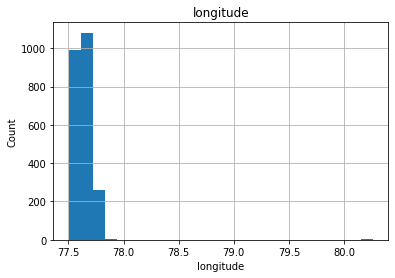

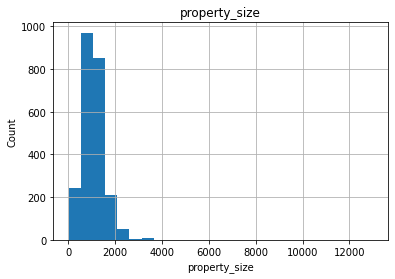

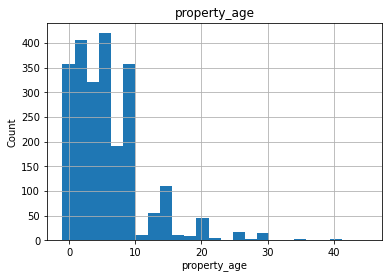

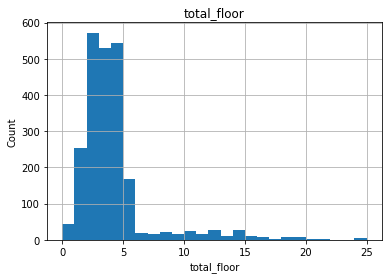

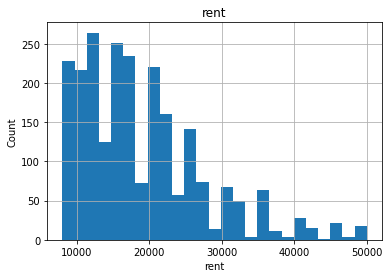

In [19]:
# Displaying the histogram of the continuos variables
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


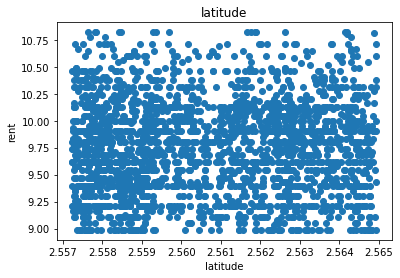

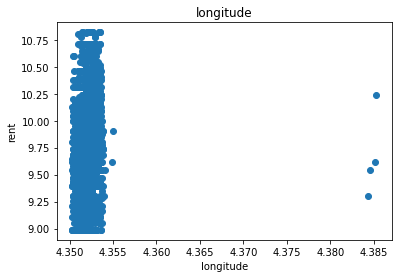

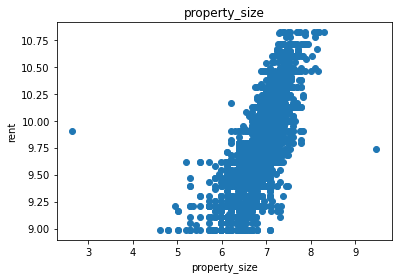

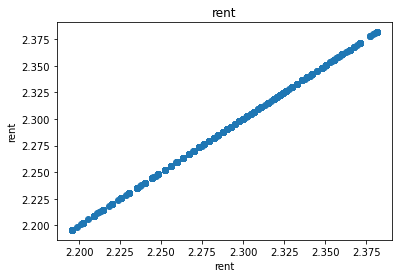

In [20]:
# Scatter plot to understand the linear/non-linear relationship of continuos value wrt to independent variable

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['rent']=np.log(data['rent'])
        plt.scatter(data[feature],data['rent'])
        plt.xlabel(feature)
        plt.ylabel('rent')
        plt.title(feature)
        plt.show()
        
    

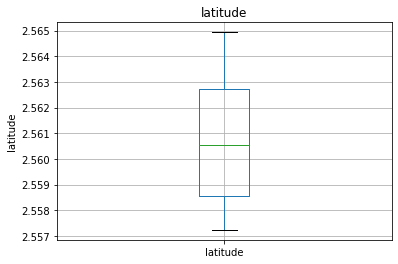

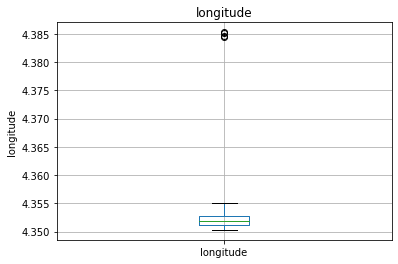

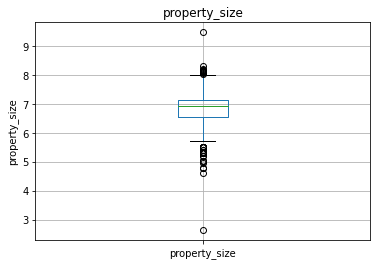

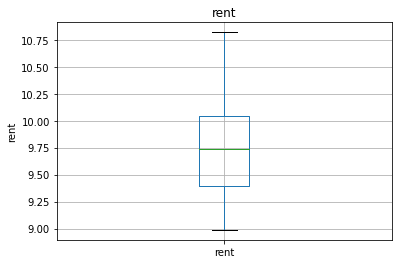

In [21]:
# Displaying the outliers to better understand the nature using box-plot

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

In [22]:
# Here on we deal with the categorical data
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['id',
 'type',
 'locality',
 'activation_date',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'amenities',
 'water_supply',
 'building_type']

In [ ]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is id and number of categories are 2340
The feature is type and number of categories are 6
The feature is locality and number of categories are 528
The feature is activation_date and number of categories are 2330
The feature is lease_type and number of categories are 4
The feature is furnishing and number of categories are 3
The feature is parking and number of categories are 4
The feature is facing and number of categories are 8
The feature is amenities and number of categories are 959
The feature is water_supply and number of categories are 4
The feature is building_type and number of categories are 4


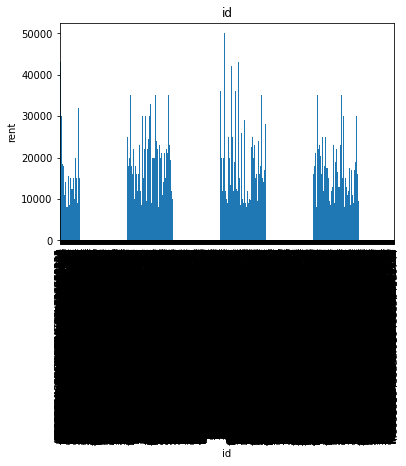

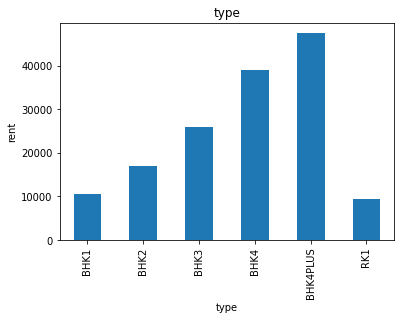

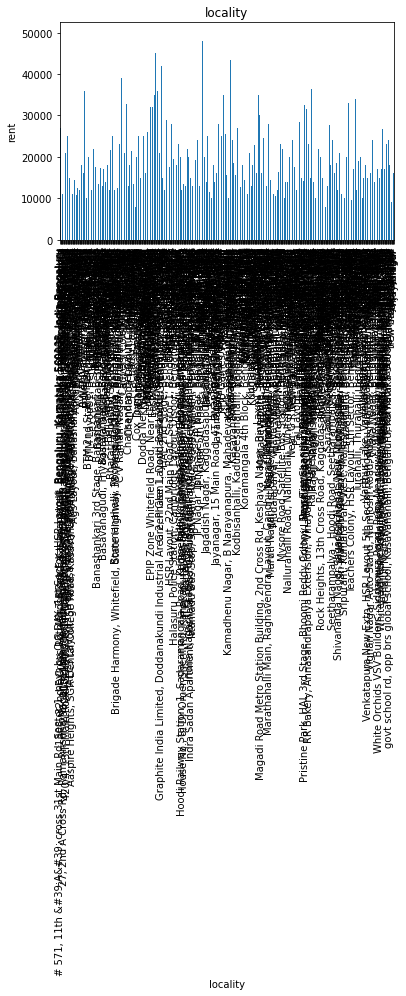

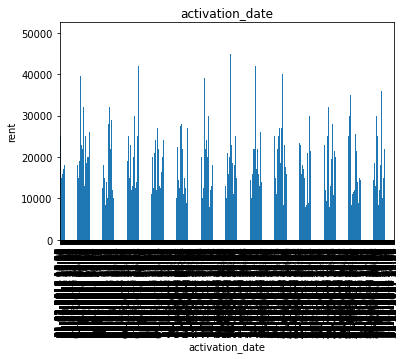

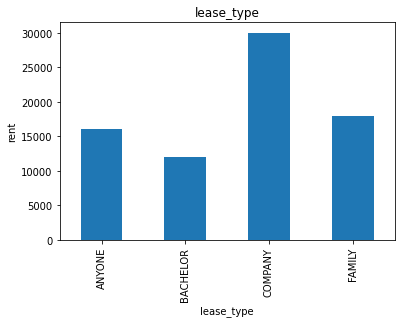

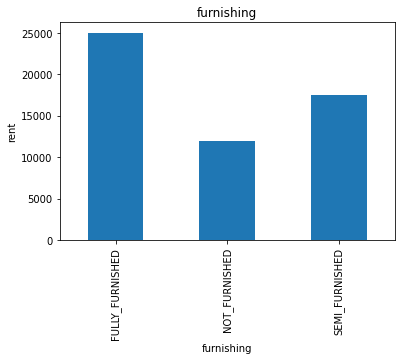

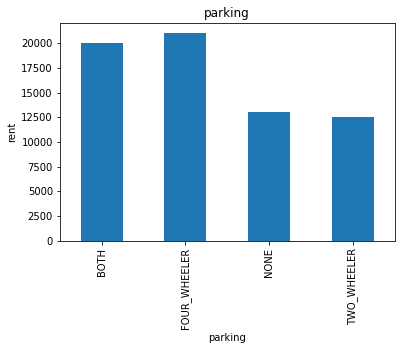

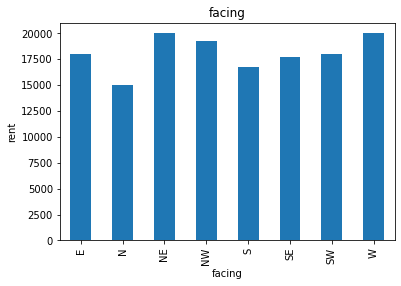

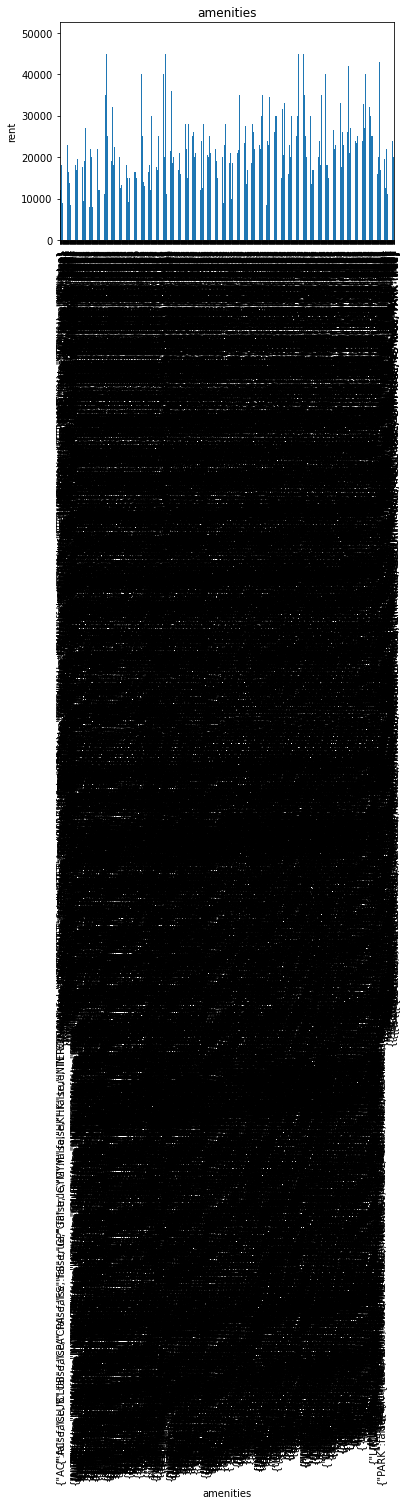

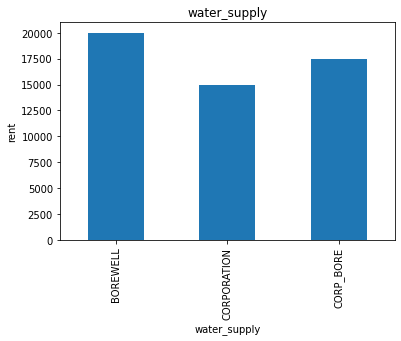

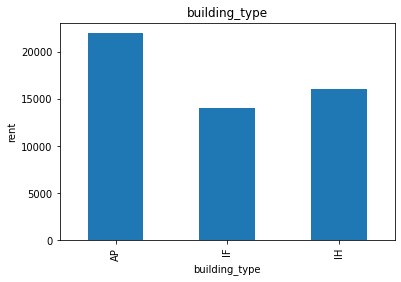

In [24]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['rent'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('rent')
    plt.title(feature)
    plt.show()